# Shopping list
Source: https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/

- [x] [MDIDSSF](#MDIDSSF)
- [x] [REF](#REF)
- [ ] [MDSSFTD](#MDSSFTD) (15minute data?? => select only the time VIIRS overpass??

# Import

In [1]:
import requests
import os
from datetime import datetime, timedelta
import os
import time

save_folder=r"E:\WaPORQA\MSG"
server_user="trngbich"
server_passwd="IHEw@ter@ccounting1"


# MDIDSSF

In [3]:
variable = 'MDIDSSF'
url_template='https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDIDSSF/NETCDF/{year}/{month}/{day}/NETCDF4_LSASAF_MSG_DIDSSF_MSG-Disk_{year}{month}{day}0000.nc'
folder= os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
    
# Define the start and end dates
start_date = datetime(2022, 11, 24)
end_date = datetime(2022, 11, 26)

# Create an empty list to store the dates
date_list = []

# Calculate the dates in between
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(days=1)

date_list=[datetime(2021,7,22), datetime(2022,12,4)]

for date in date_list:
    url=url_template.format(year=date.strftime('%Y'),month=date.strftime('%m'),day=date.strftime('%d'))                           
    print(url)
    filename=url.split('/')[-1]
    filepath=os.path.join(folder,filename)
    if not os.path.isfile(filepath):
        response = requests.get(url,auth=(server_user, server_passwd))
        if response.status_code == 200:
            with open(filepath, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {filename}")
        else:
            print(f"Failed to download. Status code: {response.status_code}")
            print(date) 

https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDIDSSF/NETCDF/2021/07/22/NETCDF4_LSASAF_MSG_DIDSSF_MSG-Disk_202107220000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDIDSSF/NETCDF/2022/12/04/NETCDF4_LSASAF_MSG_DIDSSF_MSG-Disk_202212040000.nc


## Inspect data

In [3]:
import glob 
import xarray as xr
fhs=glob.glob(r"E:\WaPORQA\MSG\MDIDSSF\*.nc")
ds=xr.open_dataset(fhs[0])
ds

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat                            (lat) float32 80.0 79.95 ... -79.95 -80.0
  * lon                            (lon) float32 -80.0 -79.95 ... 79.95 80.0
  * time                           (time) datetime64[ns] 2018-01-01
Data variables:
    DSSF                           (time, lat, lon) float64 ...
    crs                            |S1 ...
    max_nslots_missing             (time, lat, lon) float64 ...
    missing_values_percent         (time, lat, lon) float64 ...
    weight_missing_values_percent  (time, lat, lon) float64 ...
Attributes: (12/27)
    date_created:               2022-12-01T11:19:18Z
    algorithm_version:          2.0.0
    base_algorithm_version:     0.6.1
    processing_level:           04
    platform:                   MSG3
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

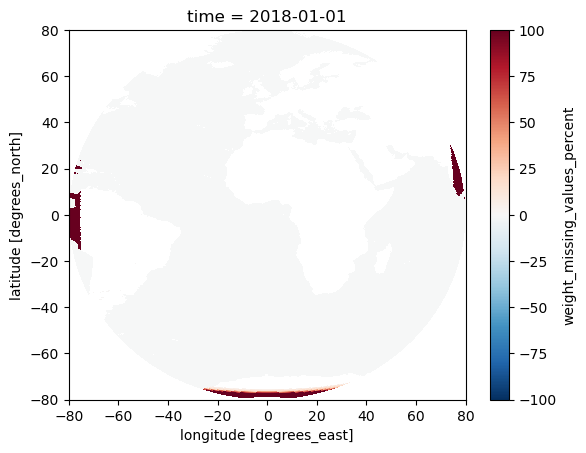

In [10]:
ds.weight_missing_values_percent[0].plot()

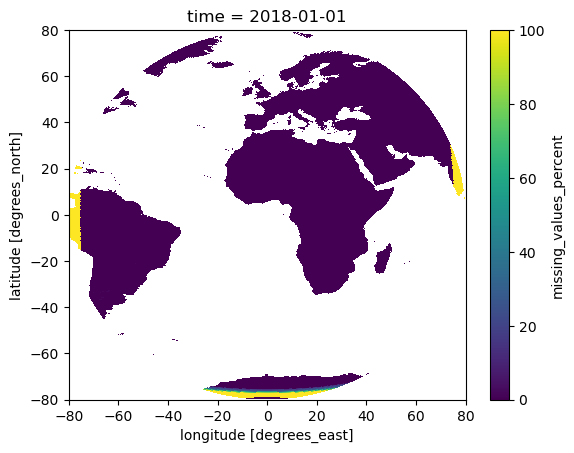

In [9]:
ds.missing_values_percent[0].plot()

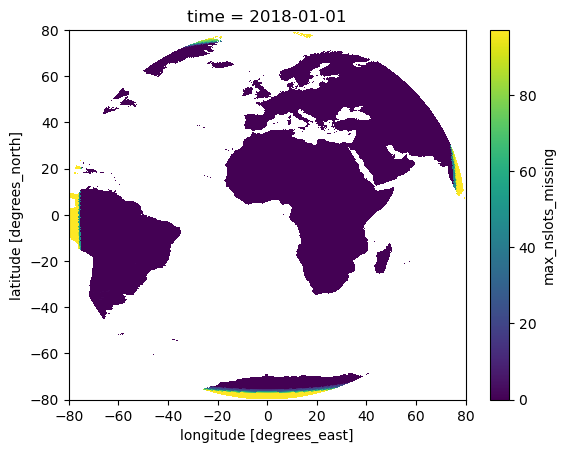

In [8]:
ds.max_nslots_missing[0].plot()

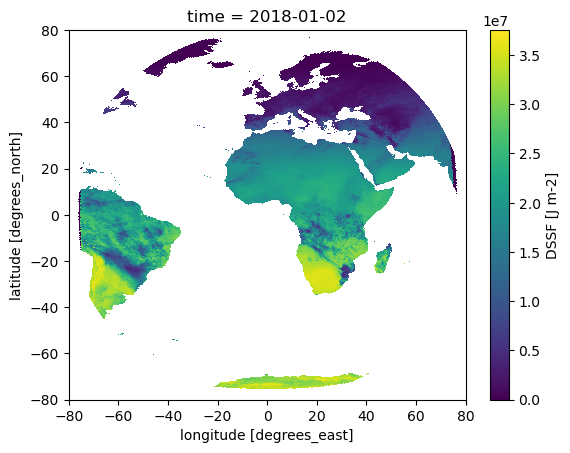

In [15]:
ds.DSSF[0].plot()

In [13]:
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
dss=ds.sel(          
    lat=slice(max_lat,min_lat),
    lon=slice(min_lon, max_lon)
    )
dss

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 1601, lon: 1901)
Coordinates:
  * lat                            (lat) float32 40.0 39.95 ... -39.95 -40.0
  * lon                            (lon) float32 -30.0 -29.95 ... 64.95 65.0
  * time                           (time) datetime64[ns] 2018-01-02
Data variables:
    DSSF                           (time, lat, lon) float64 ...
    crs                            |S1 ...
    max_nslots_missing             (time, lat, lon) float64 ...
    missing_values_percent         (time, lat, lon) float64 ...
    weight_missing_values_percent  (time, lat, lon) float64 ...
Attributes: (12/27)
    date_created:               2022-12-01T11:24:28Z
    algorithm_version:          2.0.0
    base_algorithm_version:     0.6.1
    processing_level:           04
    platform:                   MSG3
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

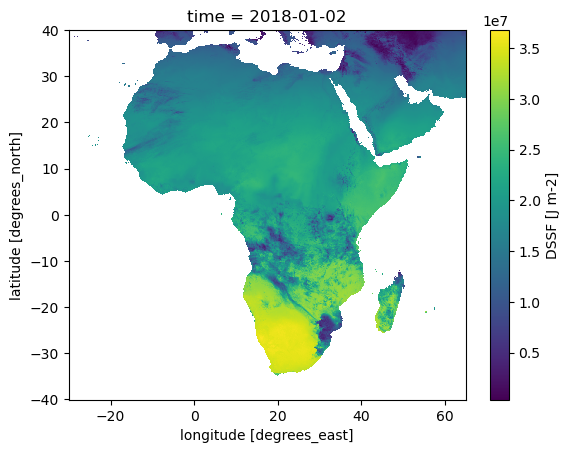

In [14]:
dss.DSSF[0].plot()

# REF

In [2]:
variable = 'METREF'
url_template='https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/{year}/{month}/{day}/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_{year}{month}{day}0000.nc'
folder= os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
    
# Define the start and end dates
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

# Create an empty list to store the dates
date_list = []

# Calculate the dates in between
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(days=1)
    

for date in date_list:
    url=url_template.format(year=date.strftime('%Y'),month=date.strftime('%m'),day=date.strftime('%d'))                           
    print(url)
    filename=url.split('/')[-1]
    filepath=os.path.join(folder,filename)
    if not os.path.isfile(filepath):
        response = requests.get(url,auth=(server_user, server_passwd))
        if response.status_code == 200:
            with open(filepath, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {filename}")
        else:
            print(f"Failed to download. Status code: {response.status_code}")
            print(date) 

https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/01/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201010000.nc
Downloaded NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201010000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/02/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201020000.nc
Downloaded NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201020000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/03/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201030000.nc
Downloaded NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201030000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/04/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201040000.nc
Downloaded NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201040000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/05/NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201050000.nc
Downloaded NETCDF4_LSASAF_MSG_METREF_MSG-Disk_202201050000.nc
https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/METREF/NETCDF/2022/01/

# MDSSFTD

In [ ]:
variable = 'MDSSFTD'
url_template='https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDSSFTD/NETCDF/{year}/{month}/{day}/NETCDF4_LSASAF_MSG_MDSSFTD_MSG-Disk_{year}{month}{day}0000.nc'
hour_list=[]
folder= os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
    
# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 1, 1)

# Create an empty list to store the dates
date_list = []

# Calculate the dates in between
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(days=1)
    

for date in date_list:
    url=url_template.format(year=date.strftime('%Y'),month=date.strftime('%m'),day=date.strftime('%d'))                           
    print(url)
    filename=url.split('/')[-1]
    filepath=os.path.join(folder,filename)
    if not os.path.isfile(filepath):
        response = requests.get(url,auth=(server_user, server_passwd))
        if response.status_code == 200:
            with open(filepath, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {filename}")
        else:
            print(f"Failed to download. Status code: {response.status_code}")
            print(date) 